In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255
print(X_train.shape)

(60000, 28, 28)


In [ ]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.9109 - val_loss: 0.1412 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1439 - accuracy: 0.9570 - val_loss: 0.1063 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9675 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9735 - val_loss: 0.0719 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0745 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.0723 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575 - accuracy: 0.9807 - val_loss: 0.0754 - val_accuracy:

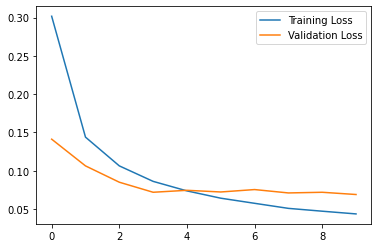

In [ ]:
# plot the loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
p_test = model.predict(X_test, verbose=1).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
assert p_test.shape == Y_test.shape

Text(0.5, 1.0, 'CORRECT: 7, PREDICTED: 2')

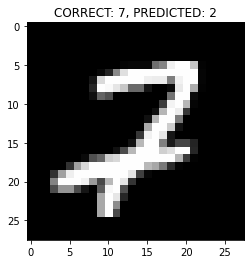

In [ ]:
import numpy as np
invalid_indices = np.where(p_test != Y_test)[0]
idx = np.random.choice(invalid_indices)
plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.title(f"CORRECT: {Y_test[idx]}, PREDICTED: {p_test[idx]}")